# Exploratory Data Analysis (EDA)

# 0. Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = "./healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(filepath)

# 1. Understanding Data Context


## 1.1. Define problem
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to <span style="color: red;">predict whether a patient is likely to get stroke</span> based on the input parameters like gender, age, various diseases, and smoking status. We will start with basic exploratory data analysis <span style="color: yellow;">(EDA)</span>, followed by applying some <span style="color: yellow;">simple predictict modelling</span>.

Please focus on understanding the high-level concepts first before figuring out the details of the code (you will get used to the coding part with practice).

- Sections labeled **Exercises** are self-practice sections (with help from your trainer). You can use the results of these sections for your report.
- Similarly, there are suggestive questions throughout the report that might take deeper investigation and thought. Your answers would be useful for both your reports and future job interviews


In [3]:
# Print the DataFrame
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 1.2. Describe the dataset

### 1.2.1 Properties of the dataset
- info, shape, columns, describe 

In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
stroke_data.shape

(5110, 12)

In [7]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke_counts = stroke_data['stroke'].value_counts()
stroke_counts

stroke
0    4861
1     249
Name: count, dtype: int64

In [9]:
stroke_percentages = stroke_data['stroke'].value_counts(normalize=True) * 100
stroke_percentages

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

### Addition

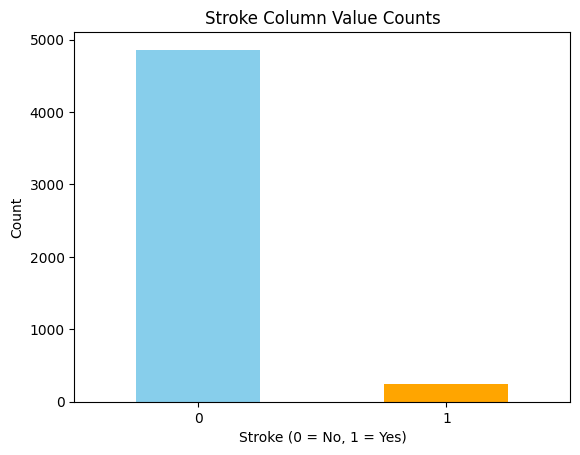

In [10]:
# Check for Imbalance
stroke_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Stroke Column Value Counts')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### 1.1.2. The meaning of columns
Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

- Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 1.3. Exercises



<span style="color: yellow; font-weight: bold;">Exercises:</span>
- 1. Which columns are numerical and which ones are categorical?
- 2. Why is it important to analyze numerical and non-numerical columns separately?

### 1.3.1. Exercise 1

- Determine the datatype of each column by its dtype

In [11]:
num_cols = []
cate_cols = []
for col in stroke_data.columns:
    if stroke_data[col].dtype == 'int64' or stroke_data[col].dtype == 'float64':
        num_cols.append(col)
    else:
        cate_cols.append(col)
print('num cols:', num_cols)
print('cate cols:', cate_cols)

num cols: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
cate cols: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [12]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 1.3.2. Exercise 2

- Analyzing numerical and non-numerical (categorical) columns separately in a data science project is crucial because they contain different types of information and require distinct handling for preprocessing, analysis, and modeling.

- Different Statistical Properties:
  - Numerical Columns: mean, median, variance, correlation,...
  - Non-Numerical Columns: frequency counts, mode, proportions,...
- Preprocessing Requirements:
  - Numerical Columns: 
    - scaling or normalization (e.g., Min-Max Scaling, Standardization).
    - handling outliers using methods like clipping or transformation.
  - Non-Numerical Columns: 
    - encoding to convert into numerical form for modeling (e.g., one-hot encoding, label encoding, or embeddings).
    - may require imputation of missing values with the mode instead of mean or median.
- Visualizations:
  - Numerical Columns: allows trends, patterns, and relationships to be discovered through summary statistics or visualizations like histograms, scatterplots, or boxplots.
  - Non-Numerical Columns: helps in understanding distributions of categories using bar charts, pie charts, or heatmaps.
- Interpretable visualizations:
  - Numerical Data: Correlation matrices, trend lines, or density plots.
  - Non-Numerical Data: Frequency tables, stacked bar charts, or group-wise comparisons.


# 2. Formulate Data Questions (Hypothesis)

## 2.1. Problems
<span style="color: yellow; font-weight: bold;">Exercises:</span>
- 1. What interesting insights can be gained from data?
- 2. What questions can be interesting to the stakeholders?

### Age and Stroke

<Axes: xlabel='stroke', ylabel='age'>

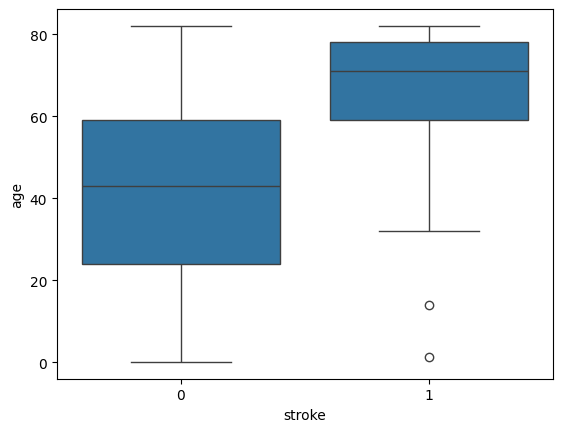

In [13]:
sns.boxplot(data=stroke_data, x='stroke', y='age')

-> Insight: Stroke risk tends to increase with age, so older individuals may dominate the stroke = 1 category.

### Hypertension and Heart Disease

- Compare the prevalence of hypertension (hypertension = 1) and heart disease (heart_disease = 1) in the stroke and non-stroke groups:

In [14]:
hypertension_by_stroke = stroke_data.groupby('stroke')['hypertension'].mean()
heart_disease_by_stroke = stroke_data.groupby('stroke')['heart_disease'].mean()
print(hypertension_by_stroke, heart_disease_by_stroke)

stroke
0    0.088871
1    0.265060
Name: hypertension, dtype: float64 stroke
0    0.047110
1    0.188755
Name: heart_disease, dtype: float64


-> Insight: People with hypertension or heart disease may have a higher risk of stroke.

### BMI and Glucose Levels

<Axes: xlabel='stroke', ylabel='bmi'>

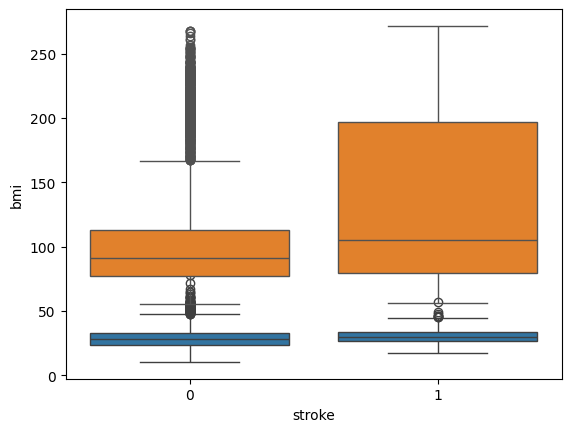

In [15]:
sns.boxplot(data=stroke_data, x='stroke', y='bmi')
sns.boxplot(data=stroke_data, x='stroke', y='avg_glucose_level')

### Smoking Status with Stroke

<Axes: xlabel='smoking_status', ylabel='count'>

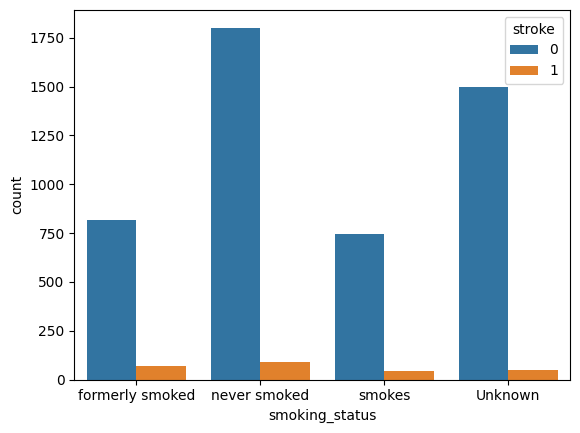

In [16]:
sns.countplot(data=stroke_data, x='smoking_status', hue='stroke')

-> Smoking doesn't cause higher stroke rate

### Work Type and Residence

<Axes: xlabel='work_type', ylabel='count'>

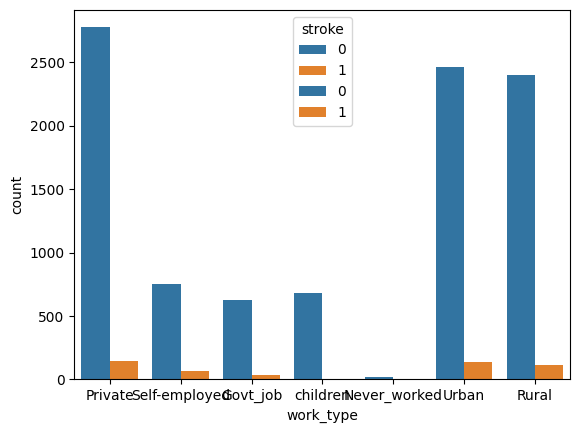

In [17]:
sns.countplot(data=stroke_data, x='work_type', hue='stroke')
sns.countplot(data=stroke_data, x='Residence_type', hue='stroke')

### Marriage and Stroke Risk

<Axes: xlabel='ever_married', ylabel='count'>

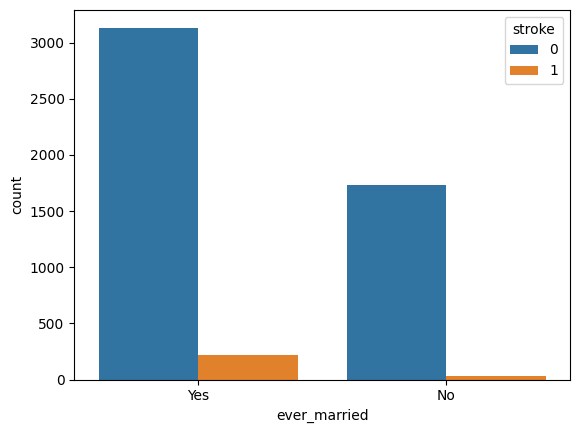

In [18]:
sns.countplot(data=stroke_data, x='ever_married', hue='stroke')

## 2.2. Multivariate Insights

### 'age', 'avg_glucose_level', 'bmi'

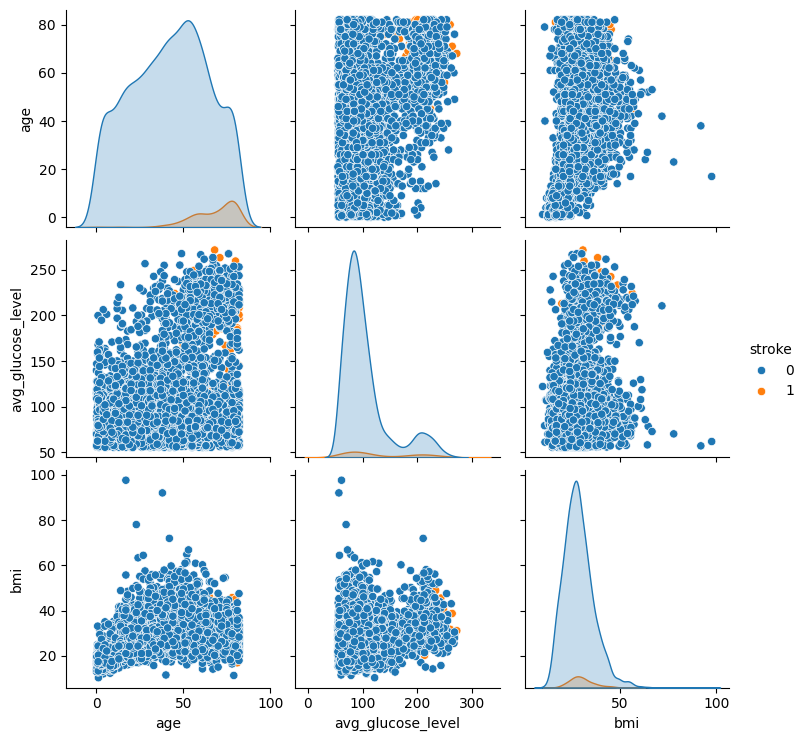

In [19]:
sns.pairplot(data=stroke_data, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])

-> Insight: Older individuals with high glucose and BMI may exhibit compounding stroke risks.

### Outliers and Anomalies

<Axes: >

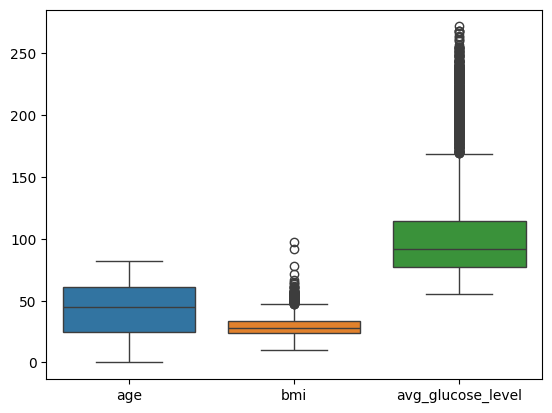

In [20]:
sns.boxplot(data=stroke_data[['age', 'bmi', 'avg_glucose_level']])

## 2.2. Exercises

### Exercise 1

### Exercise 2

# 3. Exploratory Data Analysis

## 3.1. Basic concepts
Before we start, let's revise some concepts related to distributions:
- What is a distribution?
    - a distribution describes how the values of a variable are spread or arranged. 
    - it provides insights into the frequency or probability of occurrence of different values in a dataset.
- What is the range of a distribution?
    - difference between the maximum and minimum values
- What are  quartiles and inter-quartile range?
    - quartiles are values that divide a dataset into four equal parts after sorting the data in ascending order.
        - Q1 (First Quartile): The 25th percentile. It marks the value below which 25% of the data falls.
        - Q2 (Second Quartile): The 50th percentile, also known as the median. It divides the dataset into two equal halves.
        - Q3 (Third Quartile): The 75th percentile. It marks the value below which 75% of the data falls.
    - The interquartile range (IQR) measures the spread of the middle 50% of the data. It is calculated as: IQR=Q3−Q1
- What are mean, mode, median values?
    - mean: average value
    - median: middle value when data is sorted
    - mode: most frequent values

## 3.2. Check for missing values
Why? Missing values is number one problem with a dataset because it affects almost every aspect of your downstream analysis. For example:

1. Missing values can affect all your descriptive statistics (think about how missing values can affect the "mode" of a column)
2. Missing values would also affect the quality (generalization) of predictive models


In [21]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only "bmi" has some missing values. Let's see the percentage of missing values for "bmi"

In [22]:
# Ratio of missing null values
# (number of missing BMI values ) / (number of rows)
(stroke_data["bmi"].isnull().sum()/stroke_data.shape[0]) * 100

3.9334637964774952

Ratio of missing values of bmi is 3.93%

Optional: create a new dataframe with missing value counts to plot. There are other ways to visualize this statistics, this is just to practice dataframe manipulation)

In [23]:
missing_data_count = {'Missing': [stroke_data["bmi"].isnull().sum()], 'Not Missing': [stroke_data["bmi"].notnull().sum()]}
missing_bmi = pd.DataFrame(data=missing_data_count)

In [24]:
missing_bmi

,Missing,Not Missing
0,201,4909


<Axes: >

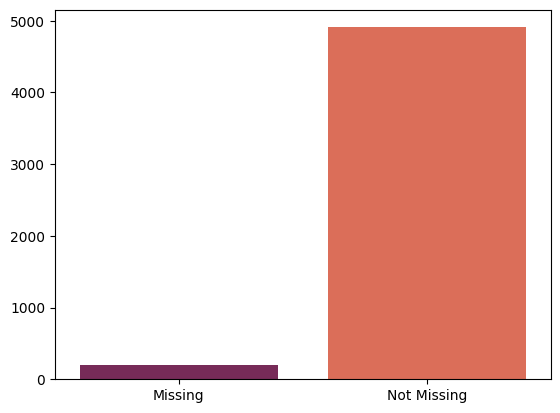

In [25]:
# Plotting the missing values
sns.barplot(data=missing_bmi , palette="rocket")

### 3.2.1. Categorical and Numerical Variables

col_names() - This a function created to get the columns names that has categorical and numerical data separately

In [26]:
def col_names(df):
    # Get categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    # Get numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    # Get Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    # num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
    return num_cols, cat_cols

In [27]:
numerical_cols, categorical_cols = col_names(stroke_data)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


In [28]:
stroke_data["hypertension"].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

### 3.2.2. Analysing Numerical Attributes

In [29]:
# what are the columns of table below
stroke_data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


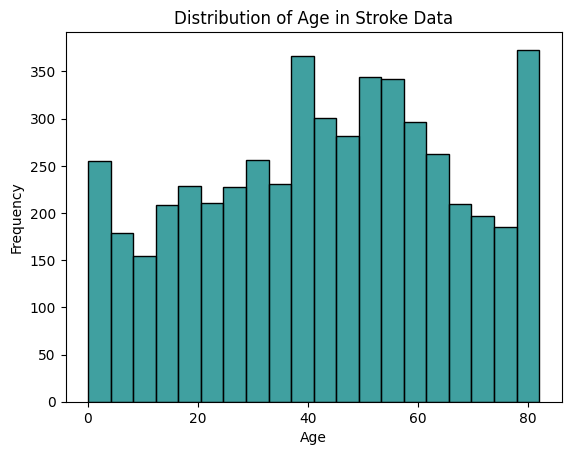

In [30]:
# Visualize each attribute
sns.histplot(x=stroke_data["age"], data=stroke_data, color="teal")

plt.title("Distribution of Age in Stroke Data")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

**Comment**
- Range: the data spans from 0 to approximately 80 years. This suggests the dataset covers a wide age range, including both children and older adults.
- Peak Frequency: the highest frequency is observed in the age group of around 80, followed by individuals in their 40s and 60s. This may indicate a significant representation of elderly individuals and middle-aged groups in the dataset.
- A somewhat bimodal-like behavior is present, with peaks around 40 and 80

### 3.2.3. Exercises
**Exercises:**
- Can you plot the histograms of other numerical columns?
- Can you show the plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row?
- Can you show customize the axes of the plots to show "Age" , "Average Gluscose Level", "BMI" on the x-axes?
- References:
  - https://seaborn.pydata.org/generated/seaborn.histplot.html
  - https://www.w3schools.com/python/matplotlib_histograms.asp  

<span style="color: yellow; font-weight: bold;">Exercises:</span>
- Can you plot the histograms of other numerical columns?
- Can you show the box plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row, each plot is vertically-oriented instead of the default horizontal orientation
- References:
  - https://seaborn.pydata.org/generated/seaborn.boxplot.html
  - https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

#### Histogram of numerical columns 

- avg_glucose_level

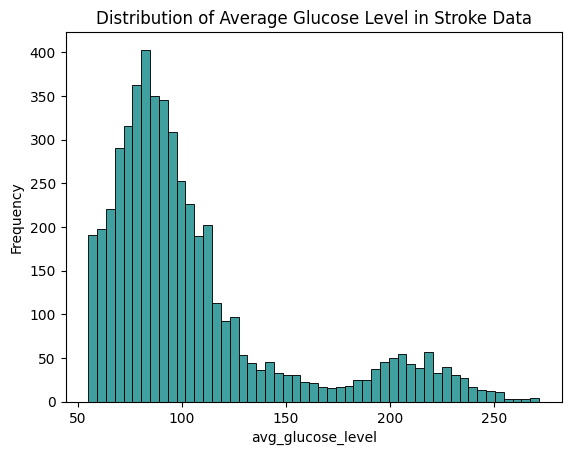

In [31]:
sns.histplot(x=stroke_data["avg_glucose_level"], data=stroke_data, color="teal")

plt.title("Distribution of Average Glucose Level in Stroke Data")
plt.xlabel("avg_glucose_level")
plt.ylabel("Frequency")

plt.show()

- bmi

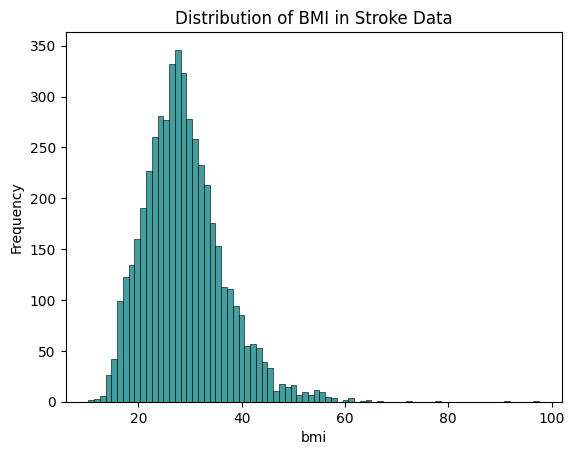

In [32]:
sns.histplot(x=stroke_data["bmi"], data=stroke_data, color="teal")

plt.title("Distribution of BMI in Stroke Data")
plt.xlabel("bmi")
plt.ylabel("Frequency")

plt.show()

## 3.3. Outliers
Outliers are another "defect" in the data that need "correction":
- Outliers can significantly affect some statistics of a distribution, which can affect both your interpretations + how you fix missing data. Can you figure out why is that so?
- Outliers can significantly affect predictive models. Can you figure out why it is so?


### 3.3.1. Check for outliers

- Checking for outliers of "BMI"

<Axes: xlabel='bmi'>

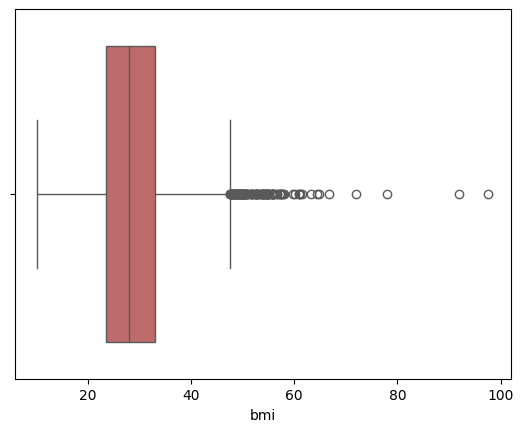

In [33]:
sns.boxplot(x=stroke_data["bmi"], data=stroke_data, color="indianred")

- What do the box, "whiskers", and dots indicate?
    - The box spans from the first quartile (Q1) to the third quartile (Q3). The line inside the box represents the median.
    - The lines extending from the box are the whiskers, showing the range of the data.
    - Points beyond the whiskers are marked as individual dots and represent unusual observations (outliers) that deviate significantly from the rest of the data.

### 3.3.2. [Extra] Checking for Outliers in Numerical Attributes

IQR (Interqartile range) is being used to check for outliers. There are other methods to do this, this snippet is mainly to practice the concept of functions in Python.

check_outliers() -  This function will return the columns with outliers

In [34]:
def check_outliers(df, numerical_cols, iqr=1.5, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + iqr * interquantile
        low_limit = q1 - iqr * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [35]:
outlier_cols = check_outliers(stroke_data, ['age'])

There is no outliers


<span style="color: yellow; font-weight: bold;">Exercises:</span>
Can you update the function call above to check for outliers for all numerical columns?

In [36]:
outlier_cols = check_outliers(stroke_data, numerical_cols)
outlier_cols

['bmi']

### 3.3.3. Analysing Categorical Attributes

- Visualize the count of each unique category in the 'work_type' column

[Text(0.5, 1.0, 'work_type')]

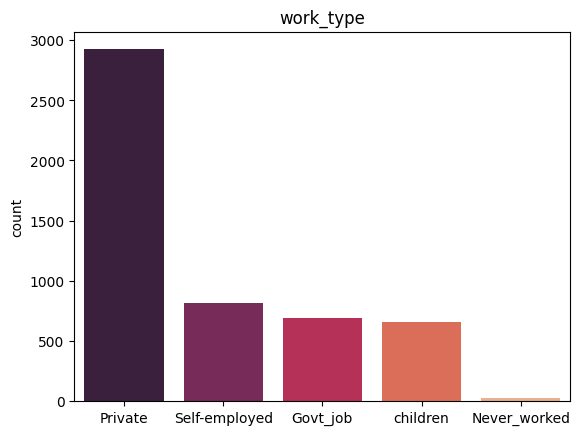

In [37]:
sns.barplot(x = stroke_data["work_type"].unique(), y = stroke_data["work_type"].value_counts(), palette="rocket").set(title="work_type")

### 3.3.4. Analysing Target Variable

- Visualize the count of each unique category in the 'stroke' column

[Text(0.5, 1.0, 'Stroke')]

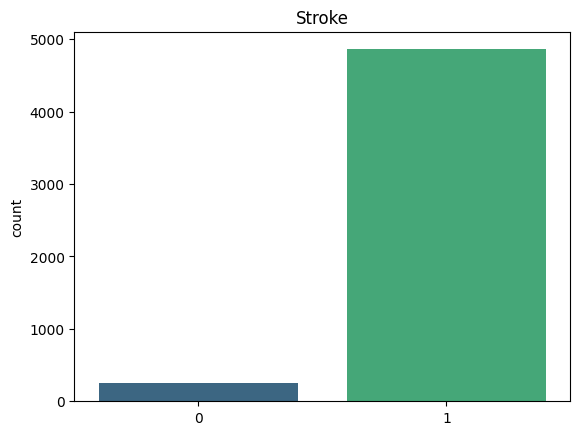

In [38]:
# Get stroke counts and plot
stroke_data["stroke"].value_counts()
sns.barplot(x = stroke_data["stroke"].unique(), y = stroke_data["stroke"].value_counts(), palette="viridis").set(title="Stroke")

([<matplotlib.patches.Wedge at 0x13f89044170>,
 [Text(-1.0871361453364168, 0.16773491438301516, '1'),
  Text(1.087136143373357, -0.1677349271061446, '0')])

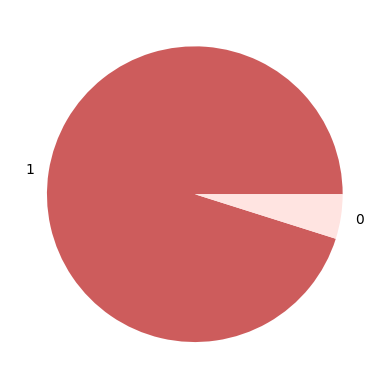

In [39]:
# Plot as percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=[1,0], colors=["indianred", "mistyrose"])

Ratio of 1s is 95.1%

**-> skewed dataset**

#### 3.3.4.1. Exercises

<span style="color: yellow; font-weight: bold;">Exercises:</span>
- Can you update the labels to "Stroke" and "No stroke" instead of "0" and "1"?
- Can you comment on the distribution of "Stroke" vs "No stroke" labels, how would this affect your predictive model?


([<matplotlib.patches.Wedge at 0x13f89644fb0>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'Stroke'),
  Text(1.087136143373357, -0.1677349271061446, 'No stroke')])

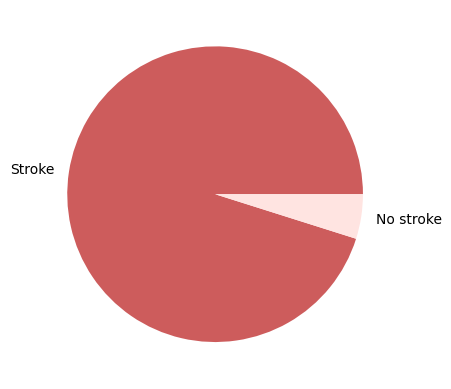

In [42]:
# Plot as percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=["Stroke", "No stroke"], colors=["indianred", "mistyrose"])

# 4. More advanced analytics

Often time, the intention of (3) Exploratory Data Analytics is to help you better shape your (2) Formulate Data Questions (Hypothesis). What we are looking for in this step is often the relationship between variables, more specifically the relationship between predictors (indepdendent variables) and the predicted (dependent variables).
- More often than not, we can draw significant insights from this step without any sophisticated predictive modeling, especially when data is limited.
- Even if you can use predictive modelling, these insights might be used to answer (to some extent) the questions of which factors are more influential in predicting certain variable, why these factors are more important etc. These questions are often more important (and more difficult) than being able to predict certain variables accurately.

- Comment: Có thể kiếm được các insights ngay từ bước xác định mqh giữa các features

## 4.1. Correlation between numerical columns

<Axes: >

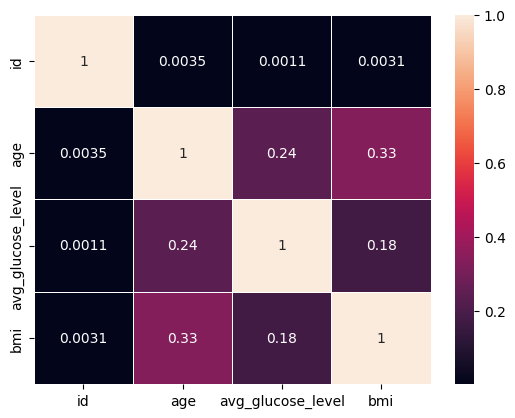

In [40]:
sns.heatmap(stroke_data[numerical_cols].corr(), annot=True, linewidths=0.5,)

- Comments:
    - Most non-diagonal values indicate weak or no linear relationships among the variables
    - 'age' and 'bmi' have a correlation of 0.33, suggesting a moderate positive relationship—older individuals may tend to have higher BMI.

### 4.1.1. Exercises

<span style="color: yellow; font-weight: bold;">Exercises:</span>
- What is correlation coefficient? How is it computed and why it is important?
    - correlation is a statistical measure that expresses the strength and direction of the relationship between two variables. It ranges from -1 to 1.
- Why we only compute corellation coefficients between numerical variables?
    - the concept of correlation measures the strength and direction of a linear relationship, which requires continuous or ordinal data where mathematical operations (like addition, subtraction, and averaging) are meaningful.
- Why is it important (or may not be important) to consider correlation between varibles?
    - it helps identify whether and how strongly variables are related. If a strong correlation exists, the value of one variable can be used to predict the other in linear regression models.
 See here https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/



- Pearson's correlation (r) - (linear relationship)
- Mối tương quan tuyến tính
- Correlation != causation
e.g. drowning rate, ice-cream sold 

## 4.2. Target Variable vs Numerical Attributes

In [41]:
for col in numerical_cols:
    print(stroke_data.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



### 4.2.1. Excercises

<span style="color: yellow; font-weight: bold;">Exercises:</span>
- Can you visualize these results?
- What interpretation can you draw from these results?

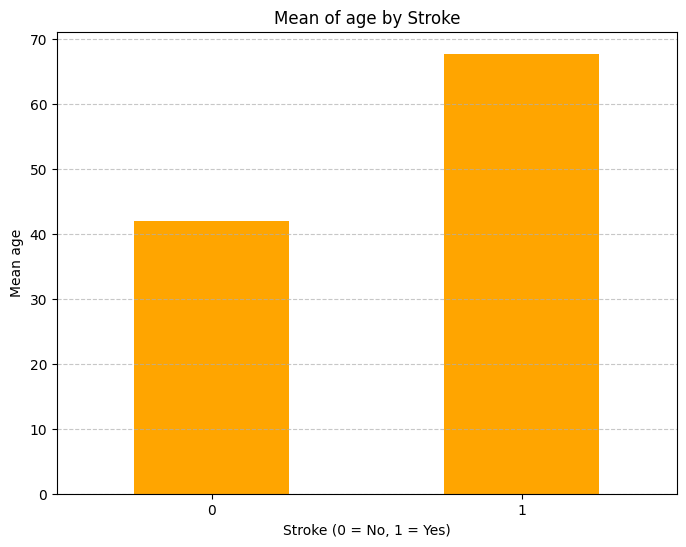

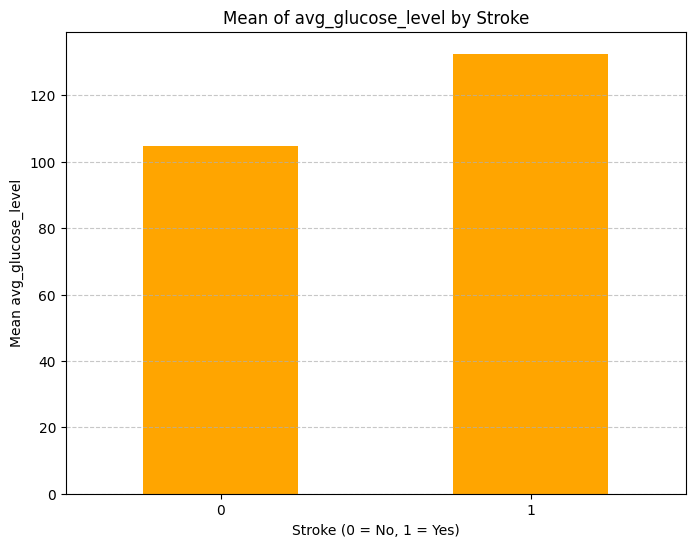

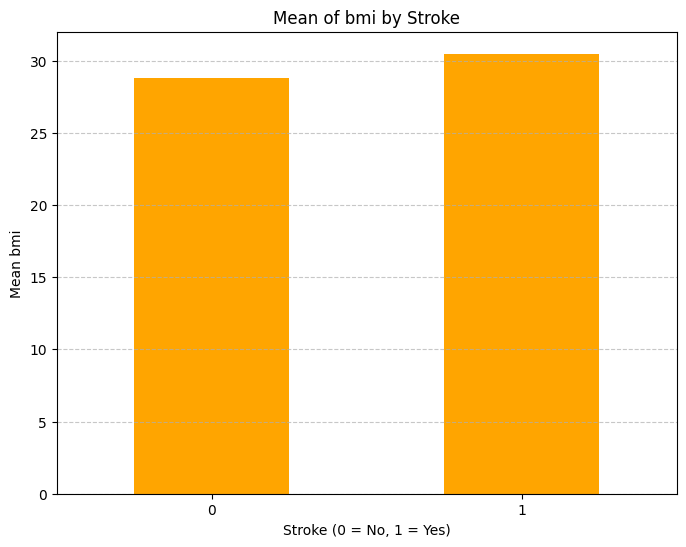

In [47]:
# Iterate through each numerical column to plot the mean values
for col in numerical_cols:
    if col != 'id':
        grouped_means = stroke_data.groupby("stroke").agg({col:"mean"})
        plt.figure(figsize=(8, 6))
        grouped_means[col].plot(kind='bar', color='orange', title=f"Mean of {col} by Stroke")
        plt.xlabel("Stroke (0 = No, 1 = Yes)")
        plt.ylabel(f"Mean {col}")
        plt.xticks(rotation=0)  # Keep x-axis labels horizontal
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

- Comments:
    - The mean age for individuals who have experienced a stroke is significantly higher than for those who haven't.
    - Individuals who had a stroke have a higher average glucose level compared to those who didn't
    - The mean bmi of both stroke and no_stroke doesn't have much differences 

## 4.3. Target Variable vs Categorical Attributes

### 4.3.1. Exercises

<span style="color: yellow; font-weight: bold;">Exercises:</span>
- Can you repeat the computation above for categorical columns?
- Can you also plot the results?
- What insights can you draw from the results?

**Calculate proportions for categorical variables.**

In [52]:
for col in categorical_cols:
    # Calculate proportions of each category within stroke groups
    proportions = stroke_data.groupby(['stroke', col]).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
    
    # Print the proportions
    print(f"Proportions for {col} grouped by Stroke:")
    print(proportions, end="\n\n")

Proportions for hypertension grouped by Stroke:
hypertension          0         1
stroke stroke                    
0      0       0.911129  0.088871
1      1       0.734940  0.265060

Proportions for heart_disease grouped by Stroke:
heart_disease         0         1
stroke stroke                    
0      0       0.952890  0.047110
1      1       0.811245  0.188755

Proportions for stroke grouped by Stroke:
stroke           0    1
stroke stroke          
0      0       1.0  NaN
1      1       NaN  1.0

Proportions for gender grouped by Stroke:
gender           Female      Male     Other
stroke stroke                              
0      0       0.586916  0.412878  0.000206
1      1       0.566265  0.433735       NaN

Proportions for ever_married grouped by Stroke:
ever_married         No       Yes
stroke stroke                    
0      0       0.355482  0.644518
1      1       0.116466  0.883534

Proportions for work_type grouped by Stroke:
work_type      Govt_job  Never_worked   P

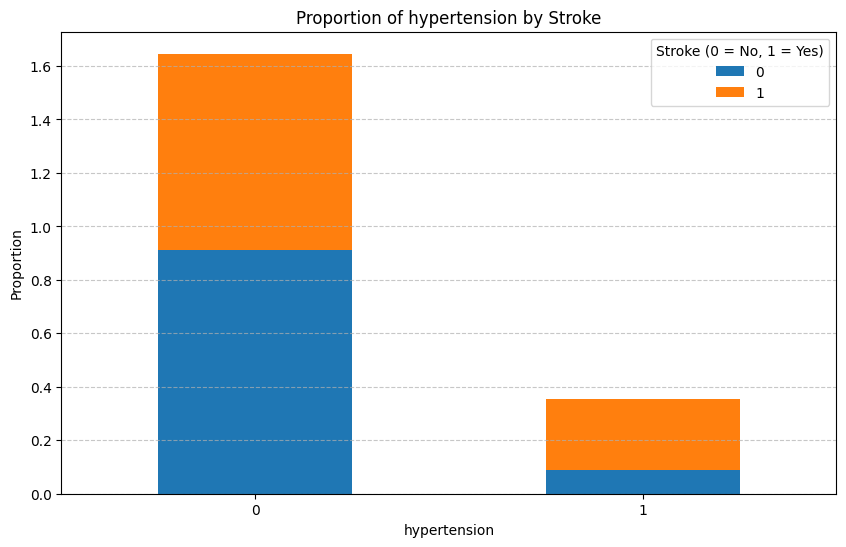

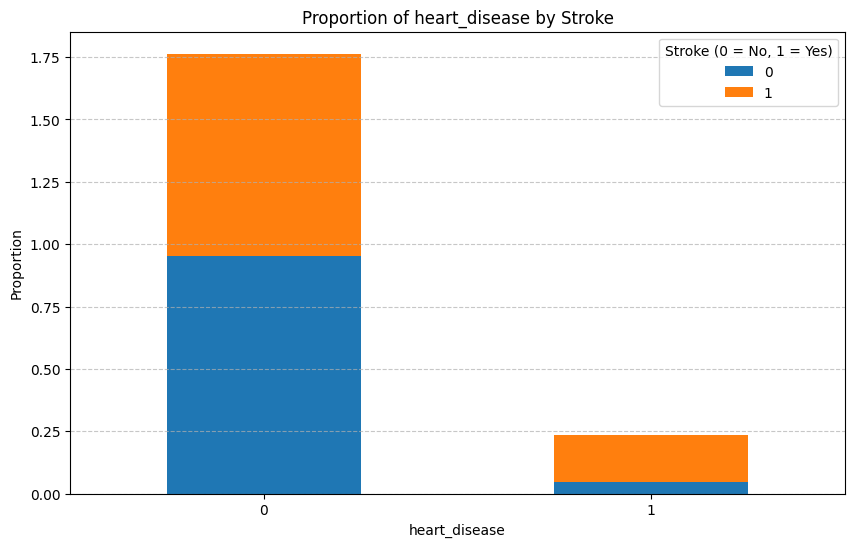

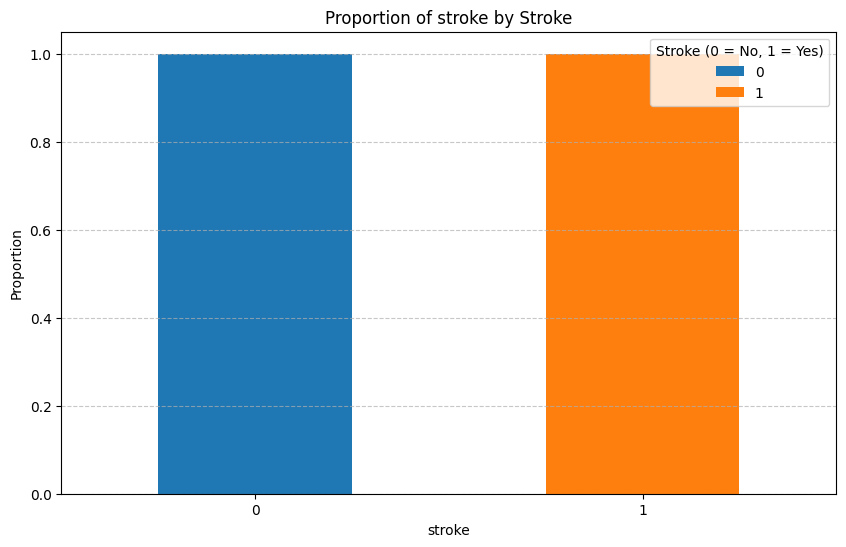

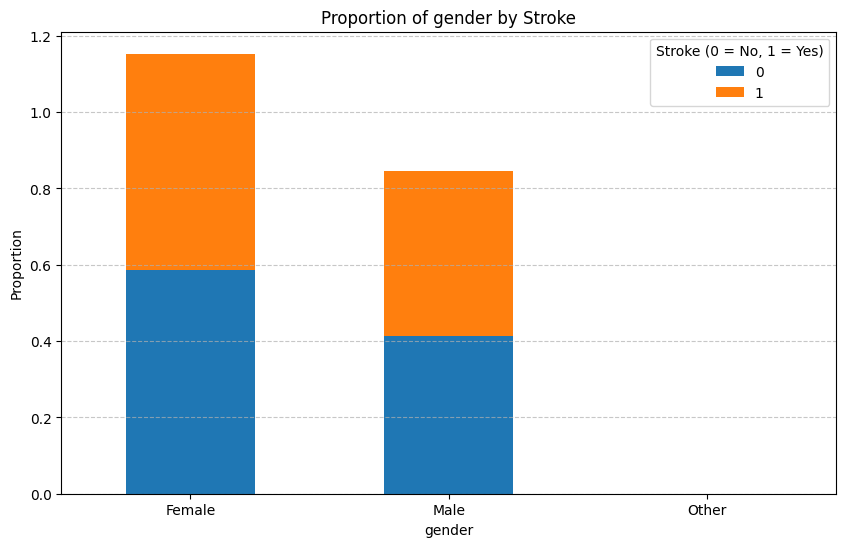

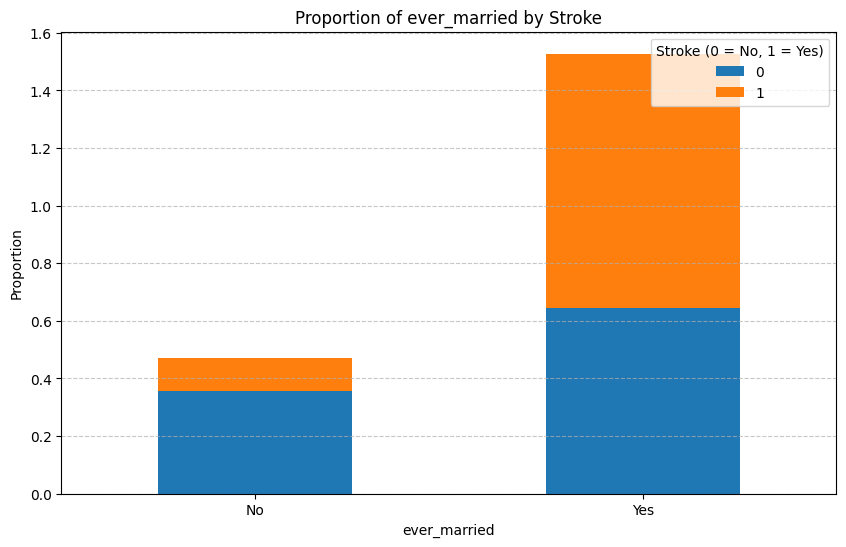

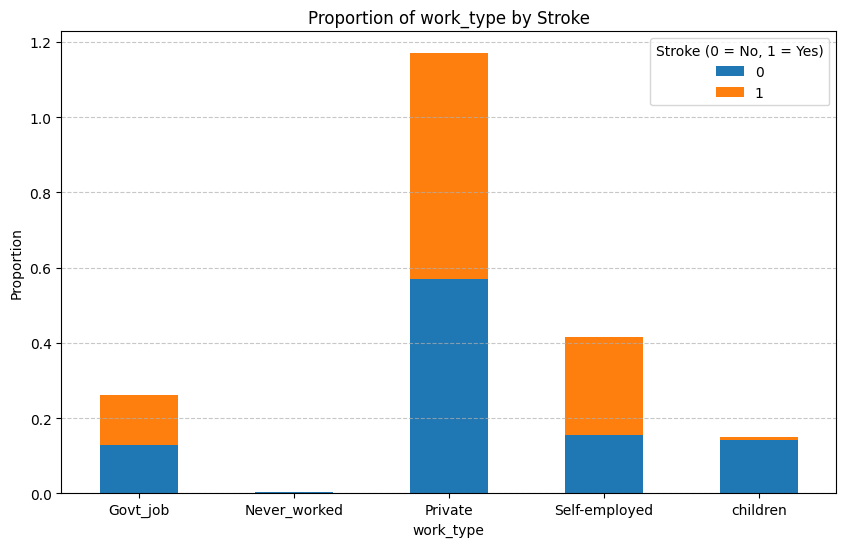

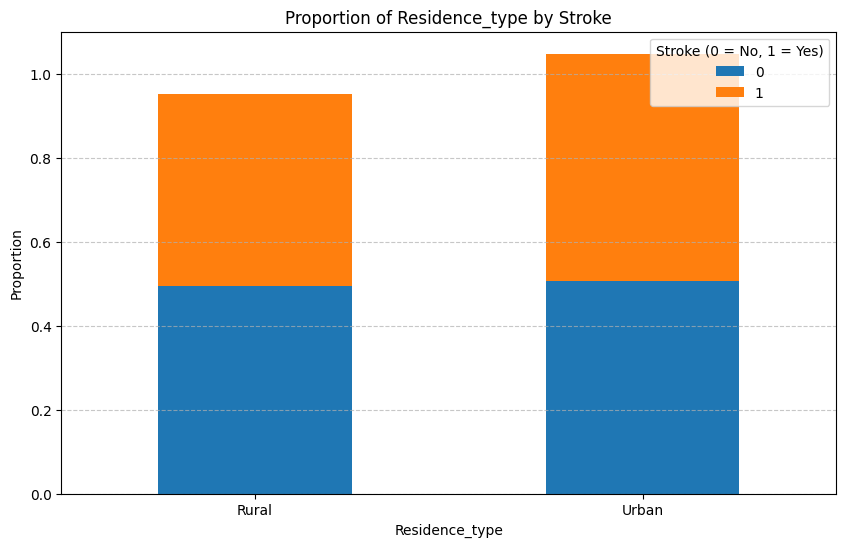

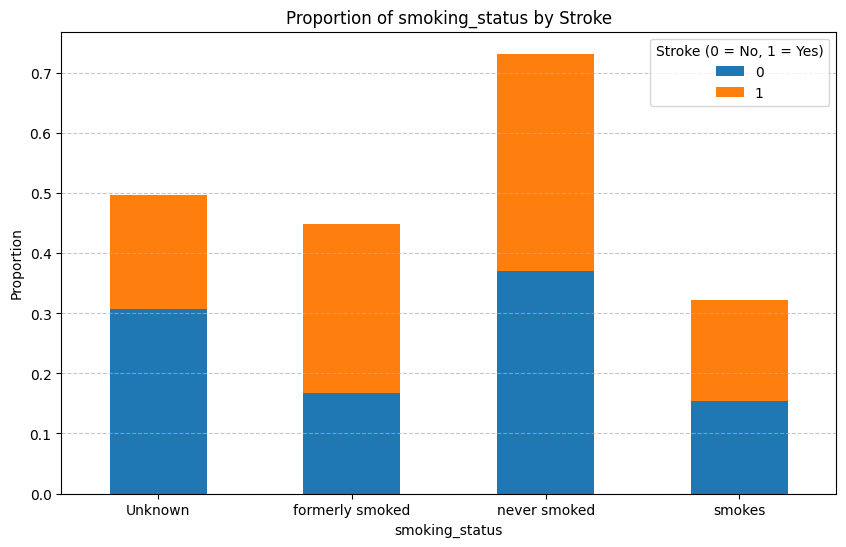

In [50]:
for col in categorical_cols:
    # Calculate counts of each category within stroke groups
    counts = stroke_data.groupby(['stroke', col]).size().unstack(fill_value=0)
    
    # Normalize the counts to get proportions
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    # Plot the proportions
    proportions.T.plot(kind='bar', figsize=(10, 6), stacked=True, title=f"Proportion of {col} by Stroke")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title="Stroke (0 = No, 1 = Yes)", loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.show()

- Interpretation

## Congratulations! You did it!

You have completed an Exploratory Data Analysis (EDA) on a real-life dataset of patients with potential strokes. Your progress so far is worth about one
or two semesters of college classes, or a few thousand dollars of data bootcamp :P. You can touch up your Jupyter notebook and showcase your report in your online portfolio!

See you next week in our machine learning course!


## Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(stroke_data)

ValueError: could not convert string to float: 'Male'